In [5]:
# Import libraries
import tweepy as tw
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import re
from wordcloud import WordCloud
# API key, API secret, access token, access token secret
API_KEY = 'sau5wefTlt00B89Sc6T1Os4Gy'
API_SECRET = 'JSg6Yyjx2o0oWETuFOiLoIXF1FAbTOj7FmX6GTS3vvIiJZNczk'
ACCESS_TOKEN = '2605619839-gosJKVnMUIbZPCGoC6cAzkzvAgto0jmg2r0DExD'
ACCESS_TOKEN_SECRET = 'siIkXRXgFuN1yUditYIYaWkVy8saqsWiEuwp69TM8CG3v'

# Authentification
auth = tw.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# API
api = tw.API(auth, wait_on_rate_limit=True)

In [6]:
# Remove urls function
def remove_url(txt):
  return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Cleaning tweet functions
def clean_text(text):
  text = re.sub("@[A-Za-z0-9]+", "", text) # Remove @mentions
  text = re.sub("#", "", text) # Remove '#'
  text = re.sub("RT[\s]+", "", text) # remove RT
  text = re.sub("https?:\/\/\S+", "", text) # Remove hyperlink
  return text

In [7]:
# Create custom search and define the number of tweets
search_custom = "#piyungan OR sampah piyungan OR sampah OR #tpstpiyungan OR tpst OR piyungan OR tpst piyungan -filter:retweets"

# Taking the tweets
raw_tweets = tw.Cursor(api.search,
                       q=search_custom,
                       lang='id',
                       since='2020-12-01',
                       tweet_mode="extended").items(2000)

# Removing url on raw_tweets
clean_raw_tweets = [remove_url(clean_text(raw_tweet.full_text)) for raw_tweet in raw_tweets]
clean_raw_tweets[:10]

['Anggota Komisi C DPRD DIY Amir Syariffudin mengatakan sistem pengelolaan sampah hanya ditumpuk atau ditimbun Seharusnya sampah dapat diolah sehingga tidak hanya ditimbun menggunungWasteToEnergy solusinya',
 'Hujan 30 menit doang jadinya obyek wisata Air terjun TPST Piyungan hanya dapat dinikmati sebentar saja Sekedar info gaess tinggi tumpukan sampah mencapai 20 m dan dalamnya 200an M luasnya 10 hektar Sudah overload warga selalu was 2 Nek jebol kepie Numpuk kok sampah',
 'TPST Piyungan Disegel Warga Sampah Membludak di JalananKejadian seperti ini tentunya tdk perlu trjd bl pengelolaan sampah di TPA menggunakan tekhnologi yang tepat efektif efisien dan ramah lingkungan Sampah merupakan bahan baku untuk produksi bahan bakar baru terbarukan',
 'Bertani Ind Coba ikut masuk ke skema KPBU Mas itu kan masih ditawarkan baru market sonding Siapa tahu nanti bs diambil oleh pengusaha daerah utk pengelolaan sampah di TPA Piyungan',
 'Ind Bertani Sebetulnya Bulan Desember tahun kmrn sdh dilakuka

In [8]:
# Create textblob object from clean_raw_tweets and translate into english
!pip uninstall googletrans
!pip install googletrans==3.1.0a0
from googletrans import Translator
translator = Translator()
sentiment_objects = []
for clean_raw_tweet in clean_raw_tweets:
  tr = translator.translate(clean_raw_tweet, dest="en")
  blob = TextBlob(tr.text)
  sentiment_objects.append(blob)

sentiment_objects[0].polarity, sentiment_objects[0]

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 1.0MB 6.4MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 71kB 4.5MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 102kB 6.2MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp36-none-any.whl size=16368 sha256=d9dcbd22bd5888170e77b1d28a1b3aa035f0b69e217fe2d56d3451f35893ddae
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=f8140f05fc6facadcfe62c4caa36731eda6ba8e16bc246b6fcb01f1229dac199
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


(0.075,
 TextBlob("Member of Commission C DIY DPRD Amir Syariffudin said the waste management system was only piled or piled up. It should have been able to be processed so that it is not only piled up with mountains. WasteToEnergy is the solution."))

In [9]:
# Create a list that consist of polarity values and the tweets
sentiment_values = [[sentiment_object.sentiment.polarity, str(sentiment_object)]for sentiment_object in sentiment_objects]

sentiment_values[:10]

[[0.075,
  'Member of Commission C DIY DPRD Amir Syariffudin said the waste management system was only piled or piled up. It should have been able to be processed so that it is not only piled up with mountains. WasteToEnergy is the solution.'],
 [0.16666666666666666,
  'It only rains for 30 minutes, so the TPST Piyungan waterfall tourist attraction can only be enjoyed for a while.'],
 [0.1094726701869559,
  'TPST Piyungan Sealed Residents of Trash Bursting on the Streets Of course, there is no need for waste management in TPA to use the right technology, effective, efficient and environmentally friendly Waste is a raw material for the production of new and renewable fuels'],
 [-0.02121212121212122,
  "Farming Ind Try to get into the Mas PPP scheme, it's still being offered a new market sonding. Who knows, it can be taken later by regional entrepreneurs for waste management at Piyungan TPA"],
 [-0.2,
  'Ind Bertani In fact, in December of this year, there was a market sounding for waste

In [10]:
# Create dataframe from sentiment_values
sentiment_df = pd.DataFrame(sentiment_values, columns=['Polarity', 'Tweet'])

sentiment_df.head(10)

,Polarity,Tweet
0,0.075000,Member of Commission C DIY DPRD Amir Syariffud...
1,0.166667,"It only rains for 30 minutes, so the TPST Piyu..."
2,0.109473,TPST Piyungan Sealed Residents of Trash Bursti...
3,-0.021212,Farming Ind Try to get into the Mas PPP scheme...
4,-0.200000,"Ind Bertani In fact, in December of this year,..."
5,-0.100000,"Farming Ind Njih Sir, maybe now you can use th..."
6,-0.050000,"Farming Ind Ready, hopefully the waste problem..."
7,-0.200000,Indigenous Farming Problems like this have occ...
8,0.000000,"If God sends rain one day and night, it will d..."
9,0.150000,Ind jogja Hopefully the Governor of DIY and th...


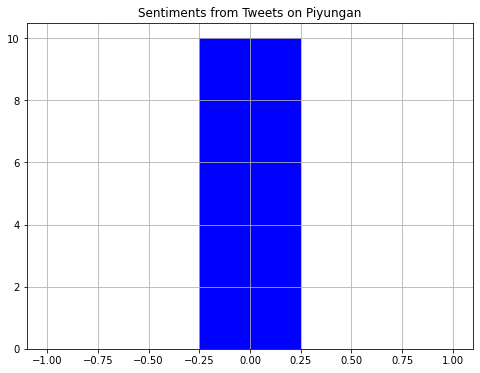

In [11]:
# Plot histogram of the polarity values
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Piyungan")
plt.show()

In [12]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.Polarity != 0]

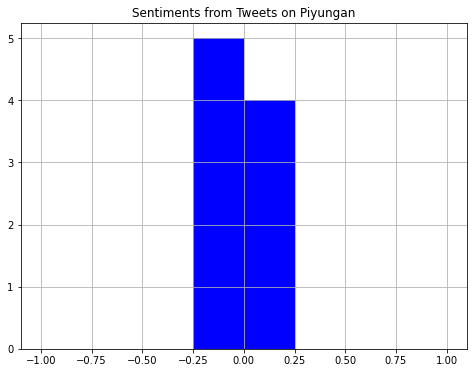

In [13]:
# Plot histogram with break at zero
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Piyungan")
plt.show()

In [14]:
# Get polarity values and get the sentiment from the tweets
total_polarity = 0
sentiment = ""

for tweet in sentiment_objects:
  total_polarity += tweet.polarity

total_polarity /= len(sentiment_objects)

if(total_polarity > 0):
  sentiment = "Positive"
elif(total_polarity < 0):
  sentiment = "Negative"

print("Polarity  : " + str(total_polarity))
print("Sentiment : " + sentiment)

Polarity  : -0.007007278435849876
Sentiment : Negative


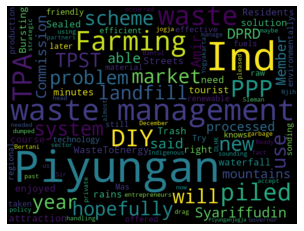

In [15]:
# Plot the word cloud
allWords = " ".join([tweet for tweet in sentiment_df["Tweet"]])
wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()